## DAT_12_SF Midterm
____________________--

### About the data
For this midterm, you'll be working with a dataset related to classifying emails as spam. The dataset was built by researchers at the UCI Machine Learning Institute

Data Set Information:

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography... 



Attribute Information:

The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. 

###Definitions of the attributes: 
_______________-

####48 continuous real [0,100] attributes of type word_freq_WORD 
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. 

####6 continuous real [0,100] attributes of type char_freq_CHAR] 
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail 

####1 continuous real [1,...] attribute of type capital_run_length_average 
= average length of uninterrupted sequences of capital letters 

####1 continuous integer [1,...] attribute of type capital_run_length_longest 
= length of longest uninterrupted sequence of capital letters 

####1 continuous integer [1,...] attribute of type capital_run_length_total 
= sum of length of uninterrupted sequences of capital letters 
= total number of capital letters in the e-mail 

####1 nominal {0,1} class attribute of type spam 
= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. 

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

from seaborn import plt
from itertools import product

pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',60)

In [2]:
# Load the spambase.csv as a pandas DataFrame (last column of data contains Target Data - is_spam)
spam_data = pd.read_csv("spambase.csv")
spam_data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.000,0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0,0.43,0.43,0,0,0,0,0,0,0,0,0,0,0,0,0.07,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.132,0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0,1.16,0.06,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.06,0,0,0.12,0,0.06,0.06,0,0,0.01,0.143,0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.137,0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.135,0,0.135,0.000,0.000,3.537,40,191,1


In [24]:
spam_data.shape

(4601, 58)

###Exercise 1: Explore the dataset and display some visualizations showing how the variables relate to each other.


#Exploration

In [27]:
spam_data.describe()
# spam_data.describe().T - transposed table

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,0.265384,0.767305,0.124845,0.098915,0.102852,0.064753,0.047048,0.097229,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,0.886955,3.367292,0.538576,0.593327,0.456682,0.403393,0.328559,0.555907,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

Notes: Std actually gives greater weight to larger deviations than smaller ones.
Statistically speaking, the mean of a variable is the "expected value" i.e. the most likely value we are most likely to observe. 
Here, the variables with the highest (above mean = 0.5)"expected values" are: word_freq_will, word_freq_you, word_freq_your, word_freq_hp, word_freq_george. Especially high expected value for capital_run_length_average, capital_run_length_longest, capital_run_length_total.

In [ ]:
# sns.pairplot(spam_data) Too large. We have too many variables.

In [4]:
# spam_data.std()

In [5]:
# Let's see how many are actually spam.
spam_data['is_spam'].value_counts()

0    2788
1    1813
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10377b210>]], dtype=object)

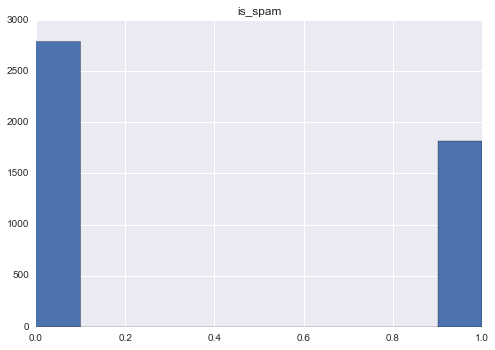

In [6]:
spam_data.hist(column='is_spam')

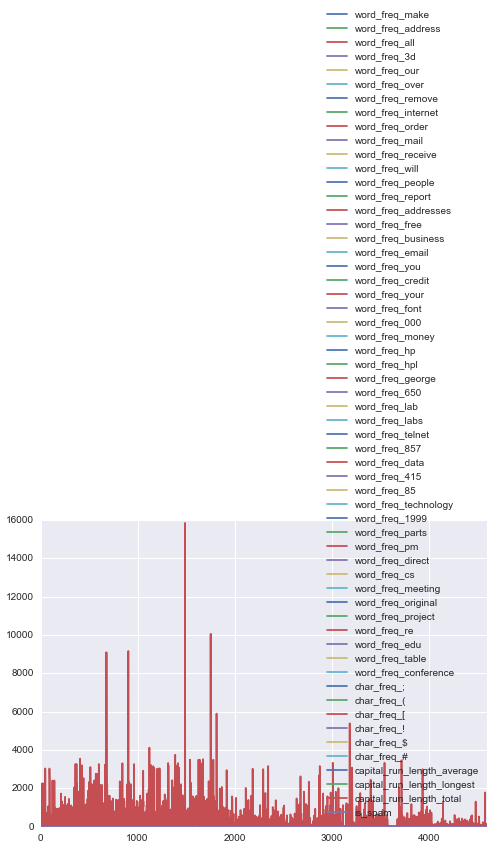

In [7]:
spam_data.plot() # not very good  to look at

In [8]:
# Correlation table for the variables
spam_data.corr()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
word_freq_make,1.000000,-0.016759,0.065627,0.013273,0.023119,0.059674,0.007669,-0.003950,0.106263,0.041198,0.188459,0.105801,0.066438,0.036780,0.028439,0.059386,0.081928,0.053324,0.128243,0.021295,0.197049,-0.024349,0.134072,0.188155,-0.072504,-0.061686,-0.066424,-0.048680,-0.041251,-0.052799,-0.039066,-0.032058,-0.041014,-0.027690,-0.044954,-0.054673,-0.057312,-0.007960,-0.011134,-0.036095,-0.009703,-0.026070,-0.024292,-0.022116,-0.037105,-0.034056,-0.000953,-0.017755,-0.026505,-0.021196,-0.033301,0.058292,0.117419,-0.008844,0.044491,0.061382,0.089165,0.126208
word_freq_address,-0.016759,1.000000,-0.033526,-0.006923,-0.023760,-0.024840,0.003918,-0.016280,-0.003826,0.032962,-0.006864,-0.040398,-0.018858,-0.009206,0.005330,-0.009117,-0.018370,0.033500,-0.055476,-0.015806,-0.018191,-0.008850,-0.020502,0.001984,-0.043483,-0.038211,-0.030307,-0.029221,-0.021940,-0.027508,-0.018097,-0.003326,-0.024903,-0.004303,-0.024058,-0.028198,-0.024013,-0.008922,-0.019124,-0.014821,-0.015420,-0.025177,-0.002370,-0.019739,-0.016418,-0.023858,-0.009818,-0.015747,-0.007282,-0.049837,-0.018527,-0.014461,-0.009605,0.001946,0.002083,0.000271,-0.022680,-0.030224
word_freq_all,0.065627,-0.033526,1.000000,-0.020246,0.077734,0.087564,0.036677,0.012003,0.093786,0.032075,0.048254,0.083210,0.047593,0.008552,0.122113,0.063906,0.036262,0.121923,0.139329,0.031111,0.156651,-0.035681,0.123671,0.041145,-0.087924,-0.062459,-0.108886,-0.050648,-0.057726,-0.032547,-0.038927,-0.061870,-0.054759,-0.061706,-0.048335,-0.046504,-0.067015,0.032407,-0.014809,-0.047066,-0.030956,-0.005811,-0.044325,-0.053464,-0.050664,-0.056655,0.029339,-0.026344,-0.033213,-0.016495,-0.033120,0.108140,0.087618,-0.003336,0.097398,0.107463,0.070114,0.196988
word_freq_3d,0.013273,-0.006923,-0.020246,1.000000,0.003238,-0.010014,0.019784,0.010268,-0.002454,-0.004947,-0.012976,-0.019221,-0.013199,0.012008,0.002707,0.007432,0.003470,0.019391,-0.010834,-0.005381,0.008176,0.028102,0.011368,0.035360,-0.015181,-0.013708,-0.010684,-0.010368,-0.007798,-0.010476,-0.007529,-0.006717,-0.008075,-0.006729,-0.006122,-0.006515,-0.007761,-0.002669,-0.004602,-0.007643,-0.005670,-0.008095,-0.009268,-0.005933,-0.012957,-0.009181,-0.003348,-0.001924,-0.000591,-0.012370,-0.007148,-0.003138,0.010862,-0.000298,0.005260,0.022081,0.021369,0.057371
word_freq_our,0.023119,-0.023760,0.077734,0.003238,1.000000,0.054054,0.147336,0.029598,0.020823,0.034495,0.068382,0.066788,0.031126,0.003445,0.056177,0.083024,0.143443,0.062344,0.098510,0.031526,0.136605,-0.020207,0.070037,0.000039,-0.072502,-0.075456,-0.088011,-0.061501,0.032048,-0.052066,-0.042535,-0.026748,-0.031998,-0.026960,-0.049732,-0.048844,-0.072599,0.130812,-0.042044,-0.021442,-0.047505,0.115041,-0.048879,0.015234,-0.042336,-0.077986,-0.026900,-0.032005,-0.032759,-0.046361,-0.026390,0.025509,0.041582,0.002016,0.052662,0.052290,0.002492,0.241920
word_freq_over,0.059674,-0.024840,0.087564,-0.010014,0.054054,1.000000,0.061163,0.079561,0.117438,0.013897,0.053900,0.009264,0.077631,0.009673,0.173066,0.019865,0.064137,0.078350,0.095505,0.058979,0.106833,0.007956,0.211455,0

In [11]:
spam_data.keys()

Index([u'word_freq_make', u'word_freq_address', u'word_freq_all', u'word_freq_3d', u'word_freq_our', u'word_freq_over', u'word_freq_remove', u'word_freq_internet', u'word_freq_order', u'word_freq_mail', u'word_freq_receive', u'word_freq_will', u'word_freq_people', u'word_freq_report', u'word_freq_addresses', u'word_freq_free', u'word_freq_business', u'word_freq_email', u'word_freq_you', u'word_freq_credit', u'word_freq_your', u'word_freq_font', u'word_freq_000', u'word_freq_money', u'word_freq_hp', u'word_freq_hpl', u'word_freq_george', u'word_freq_650', u'word_freq_lab', u'word_freq_labs', u'word_freq_telnet', u'word_freq_857', u'word_freq_data', u'word_freq_415', u'word_freq_85', u'word_freq_technology', u'word_freq_1999', u'word_freq_parts', u'word_freq_pm', u'word_freq_direct', u'word_freq_cs', u'word_freq_meeting', u'word_freq_original', u'word_freq_project', u'word_freq_re', u'word_freq_edu', u'word_freq_table', u'word_freq_conference', u'char_freq_;', u'char_freq_(', u'char_freq

(-0.5, 1.5)

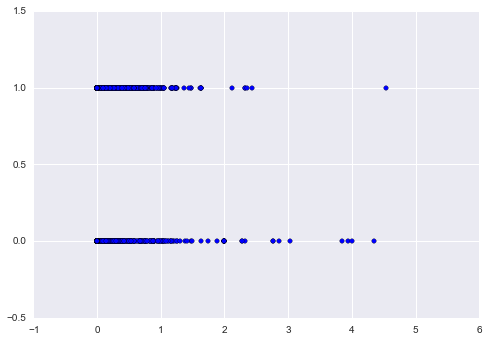

In [12]:
# word_freq_make vs. is_spam
plt.scatter(spam_data.word_freq_make, spam_data.is_spam)
plt.xlim(-1, 6); plt.ylim(-0.5, 1.5)

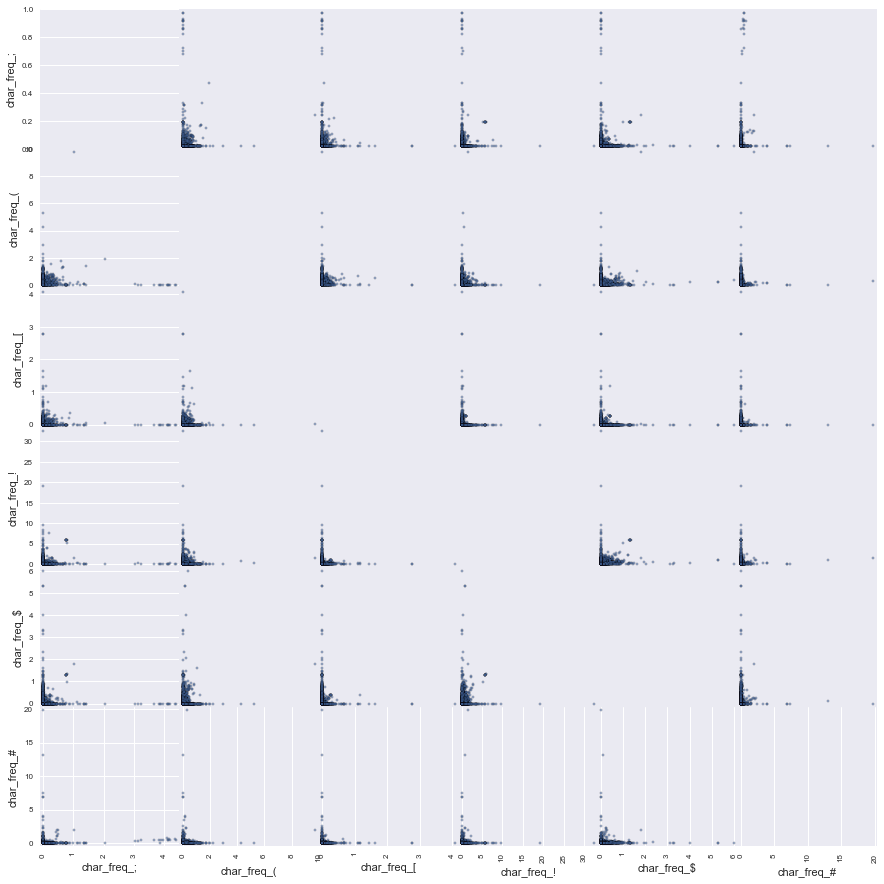

In [13]:
_ = pd.scatter_matrix(spam_data.loc[:,'char_freq_;':'char_freq_#'], figsize=(15,15), diagonal='')

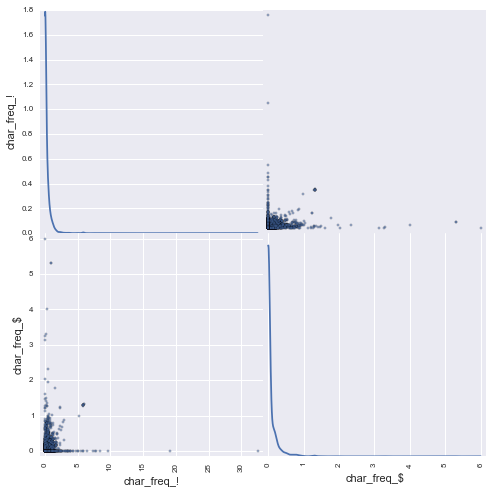

In [14]:
_ = pd.scatter_matrix(spam_data.loc[:,'char_freq_!':'char_freq_$'], 
                      figsize=(8,8), 
                      diagonal='kde')

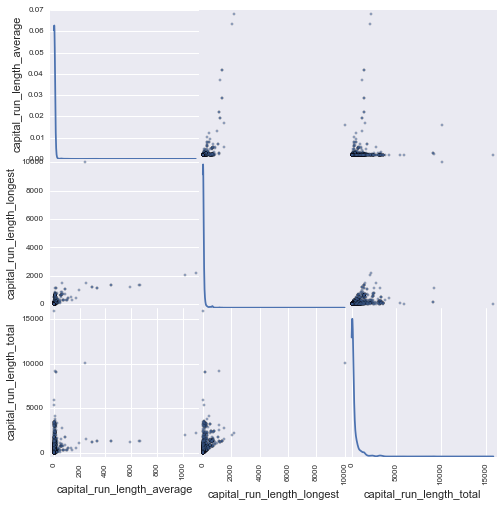

In [15]:
_ = pd.scatter_matrix(spam_data.loc[:,'capital_run_length_average':'capital_run_length_total'], 
                      figsize=(8,8), 
                      diagonal='kde')

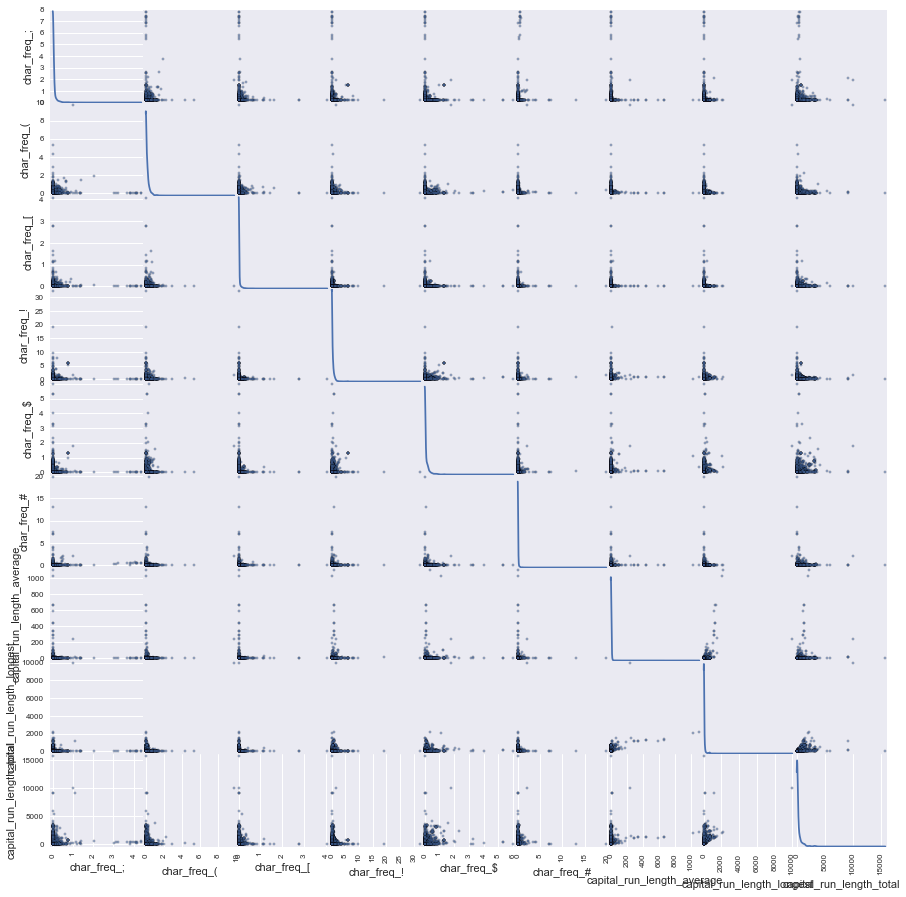

In [16]:
_ = pd.scatter_matrix(spam_data.loc[:,'char_freq_;':'capital_run_length_total'], 
                      figsize=(15,15), 
                      diagonal='kde')

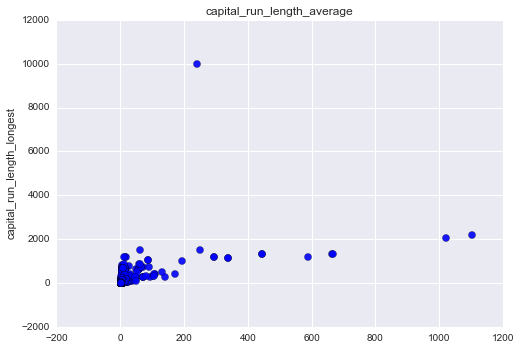

In [17]:
plt.subplot2grid((2,3),(0,4))
plt.scatter(spam_data.capital_run_length_average, spam_data.capital_run_length_longest, alpha=0.9, s=50)
# sets the y axis lable
plt.ylabel("capital_run_length_longest")
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("capital_run_length_average")

###Exercise 2: Build a simple logistic regression and visualize it

use the variable "capital_run_length_longest" to predict "is_spam"
How accurate is this single feature?

Answer: The model using "capital_run_legth_longest" only to predict "is_spam" is not a good, accurate model.

In [29]:
# Formula to predict is_spam 
formula = 'is_spam ~ capital_run_length_longest' 
# Create results dictionary to hold our regression results for easy analysis later        
results = {} 

In [30]:
# Create logistic regression model
model_logit = smf.logit(formula, spam_data)

# Fit our model to the training data
res = model_logit.fit()

# Save the result for outputing predictions later
results['Logit'] = [res, formula]
res.summary()

Optimization terminated successfully.
         Current function value: 0.562963
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                is_spam   No. Observations:                 4601
Model:                          Logit   Df Residuals:                     4599
Method:                           MLE   Df Model:                            1
Date:                Fri, 13 Mar 2015   Pseudo R-squ.:                  0.1604
Time:                        17:28:02   Log-Likelihood:                -2590.2
converged:                       True   LL-Null:                       -3085.1
                                        LLR p-value:                3.003e-217
==============================================================================================
                                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                     -1.2531      0.046    -27.416      0.000        -1.343    -1.163
capital_run_length_longest     0.0252      0.001     21.189      0.000         0.023     0.028
==============================================================================================
"""

In [31]:
# Look at the confidence interval of each coeffecient
print res.conf_int()

                                   0         1
Intercept                  -1.342635 -1.163475
capital_run_length_longest  0.022890  0.027557


In [21]:
from patsy import dmatrices

Optimization terminated successfully.
         Current function value: 0.562963
         Iterations 8


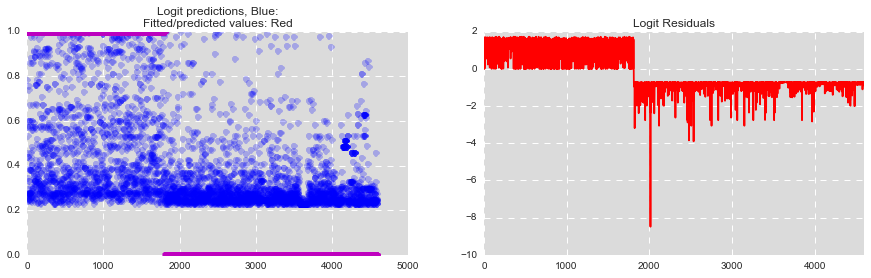

In [32]:
# create a regression freindly dataframe using patsy's dmatrices function
y,x = dmatrices(formula, data=spam_data, return_type='dataframe')

# instantiate our model
model = sm.Logit(y,x)

# fit our model to the training data
res = model.fit()

# Plot Predictions Vs Actual
plt.figure(figsize=(15,4));
plt.subplot(121, axisbg="#DBDBDB")

# generate predictions from our fitted model
ypred = res.predict(x)
xindex = range(0, len(spam_data))
plt.plot(x.index, ypred, 'bo', x.index, y, 'mo', alpha=.25);
plt.grid(color='white', linestyle='dashed')
plt.title('Logit predictions, Blue: \nFitted/predicted values: Red');

# Residuals
ax2 = plt.subplot(122, axisbg="#DBDBDB")
plt.plot(res.resid_dev, 'r-')
plt.grid(color='white', linestyle='dashed')
ax2.set_xlim(-1, len(res.resid_dev))
plt.title('Logit Residuals');

In [23]:
# Evaluate results here
res.conf_int()

,0,1
Intercept,-1.342635,-1.163475
capital_run_length_longest,0.022890,0.027557


In [40]:
# Odd Ratio
# Tells how a 1 unit increase/decrease in a capital_run_length_longest 
# affects the odds of email being spam
print np.exp(res.params)

Intercept                     0.285631
capital_run_length_longest    1.025544
dtype: float64


### Exercise 3: Use train-test spit to split your data at a 30% mark and run another logistic regression using all variables
use random state = 12 so that we can compare results

In [62]:
#spam_data.columns 
spam_data.columns.values

array(['word_freq_make', 'word_freq_address', 'word_freq_all',
       'word_freq_3d', 'word_freq_our', 'word_freq_over',
       'word_freq_remove', 'word_freq_internet', 'word_freq_order',
       'word_freq_mail', 'word_freq_receive', 'word_freq_will',
       'word_freq_people', 'word_freq_report', 'word_freq_addresses',
       'word_freq_free', 'word_freq_business', 'word_freq_email',
       'word_freq_you', 'word_freq_credit', 'word_freq_your',
       'word_freq_font', 'word_freq_000', 'word_freq_money',
       'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs',
       'word_freq_telnet', 'word_freq_857', 'word_freq_data',
       'word_freq_415', 'word_freq_85', 'word_freq_technology',
       'word_freq_1999', 'word_freq_parts', 'word_freq_pm',
       'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq

In [68]:
Y_spam_data = spam_data.ix[:,57:]
Y_spam_data = spam_data['is_spam']
    
Y_spam_data = Y_spam_data.dropna()
Y_spam_data.head()

0    1
1    1
2    1
3    1
4    1
Name: is_spam, dtype: int64

In [69]:
# Split the data into X's and drop "is_spam"

X_spam_data = spam_data.drop(['is_spam'], axis=1)
X_spam_data = X_spam_data.dropna()
X_spam_data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.000,0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0,0.43,0.43,0,0,0,0,0,0,0,0,0,0,0,0,0.07,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.132,0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0,1.16,0.06,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.06,0,0,0.12,0,0.06,0.06,0,0,0.01,0.143,0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.137,0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.135,0,0.135,0.000,0.000,3.537,40,191


In [70]:
X_spam_data.columns.values

array(['word_freq_make', 'word_freq_address', 'word_freq_all',
       'word_freq_3d', 'word_freq_our', 'word_freq_over',
       'word_freq_remove', 'word_freq_internet', 'word_freq_order',
       'word_freq_mail', 'word_freq_receive', 'word_freq_will',
       'word_freq_people', 'word_freq_report', 'word_freq_addresses',
       'word_freq_free', 'word_freq_business', 'word_freq_email',
       'word_freq_you', 'word_freq_credit', 'word_freq_your',
       'word_freq_font', 'word_freq_000', 'word_freq_money',
       'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs',
       'word_freq_telnet', 'word_freq_857', 'word_freq_data',
       'word_freq_415', 'word_freq_85', 'word_freq_technology',
       'word_freq_1999', 'word_freq_parts', 'word_freq_pm',
       'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq

In [71]:
# Add Constant
X_spam_data = sm.tools.add_constant(X_spam_data)
X_spam_data.head()

,const,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,1,0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.000,0,0.778,0.000,0.000,3.756,61,278
1,1,0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0,0.43,0.43,0,0,0,0,0,0,0,0,0,0,0,0,0.07,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.132,0,0.372,0.180,0.048,5.114,101,1028
2,1,0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0,1.16,0.06,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.06,0,0,0.12,0,0.06,0.06,0,0,0.01,0.143,0,0.276,0.184,0.010,9.821,485,2259
3,1,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.137,0,0.137,0.000,0.000,3.537,40,191
4,1,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.135,0,0.135,0.000,0.000,3.537,40,191


In [74]:
Y_spam_data.values

array([1, 1, 1, ..., 0, 0, 0])

In [76]:
# Need to split into train and test data here.
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_spam_data, Y_spam_data, test_size=0.3, random_state=12)


print X_train.shape, X_test.shape, y_train.shape, y_test.shape

(3220, 58) (1381, 58) (3220,) (1381,)


In [79]:
# Create equation for model with all variables.
formula2 = 'is_spam ~ np.log(word_freq_make) + np.log(word_freq_address) + np.log(word_freq_all) + np.log(word_freq_3d) + np.log(word_freq_our) + np.log(word_freq_over) + np.log(word_freq_remove) + np.log(word_freq_internet) + np.log(word_freq_order) + np.log(word_freq_mail) + np.log(word_freq_receive) + np.log(word_freq_will) + np.log(word_freq_peoplei) + np.log(word_freq_report) + np.log(word_freq_addresses) + np.log(word_freq_free) + np.log(word_freq_business) + np.log(word_freq_email) + np.log(word_freq_you) + np.log(word_freq_credit) + np.log(word_freq_your) + np.log(word_freq_font) + np.log(word_freq_000) + np.log(word_freq_money) + np.log(word_freq_hp) + np.log(word_freq_hpl) + np.log(word_freq_george) + np.log(word_freq_650) + np.log(word_freq_lab) + np.log(word_freq_labs) + np.log(word_freq_telnet) + np.log(word_freq_857) + np.log(word_freq_data) + np.log(word_freq_415) + np.log(word_freq_85) + np.log(word_freq_technology) + np.log(word_freq_1999) + np.log(word_freq_parts) + np.log(word_freq_pm) + np.log(word_freq_direct) + np.log(word_freq_cs) + np.log(word_freq_meeting) + np.log(word_freq_original) + np.log(word_freq_project) + np.log(word_freq_re) + np.log(word_freq_edu) + np.log(word_freq_table) + np.log(word_freq_conference) + np.log(char_freq_semi) + np.log(char_freq_lperen) +  np.log(char_freq_lbrac) +  np.log(char_freq_exclaim) + np.log(char_freq_dol) + np.log(char_freq_hash)np.log(char_freq_semi) + np.log(char_freq_lperen) +  np.log(char_freq_lbrac) +  np.log(char_freq_exclaim) + np.log(char_freq_dol) + np.log(char_freq_hash) + np.log(capital_run_length_average) + np.log(capital_run_length_longest) + np.log(capital_run_length_total)'
# Create results dictionary to hold our regression results for easy analysis later        
results2 = {} 

In [81]:
y,x = dmatrices(formula2, data = spam_data, return_type='dataframe')

NameError: name 'char_freq_exclaim' is not defined

In [80]:
y,x = dmatrices(formula2, data = spam_data, return_type='dataframe')

# Instantiate our model
model2 = sm.Logit(y,x)
# Rit our model to the training data
res2 = model2.fit()
# Save the result for outputing predictions later
results2['Logit'] = [res2, formula2]
res2.summary()

NameError: name 'char_freq_exclaim' is not defined

In [43]:
# Normalized and Scaled
from sklearn.preprocessing import scale
df_norm = pd.DataFrame(scale(spam_data))
df_norm.describe().T

,count,mean,std,min,25%,50%,75%,max
0,4601,1.853187e-17,1.000109,-0.342434,-0.342434,-0.342434,-0.342434,14.526998
1,4601,2.779780e-17,1.000109,-0.165072,-0.165072,-0.165072,-0.165072,10.900965
2,4601,2.470916e-17,1.000109,-0.556761,-0.556761,-0.556761,0.276427,9.560519
3,4601,0.000000e+00,1.000109,-0.046900,-0.046900,-0.046900,-0.046900,30.641278
4,4601,4.941832e-17,1.000109,-0.464314,-0.464314,-0.464314,0.100792,14.406908
5,4601,3.706374e-17,1.000109,-0.350266,-0.350266,-0.350266,-0.350266,21.125709
6,4601,-2.470916e-17,1.000109,-0.291794,-0.291794,-0.291794,-0.291794,18.282611
7,4601,0.000000e+00,1.000109,-0.262562,-0.262562,-0.262562,-0.262562,27.441249
8,4601,2.470916e-17,1.000109,-0.323302,-0.323302,-0.323302,-0.323302,18.557789
9,4601,1.235458e-17,1.000109,-0.371364,-0.371364,-0.371364,-0.123181,27.828440


In [44]:
#spam_data.describe().T

In [45]:
df_norm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
0,-0.342434,0.330885,0.712859,-0.0469,0.011565,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,-0.296860,0.114087,-0.312055,-0.174927,-0.190114,0.086171,-0.321135,2.081207,0.150905,-0.167893,0.125128,-0.118172,-0.290209,-0.212994,-0.328815,-0.29924,-0.227895,-0.23183,-0.166731,-0.22524,-0.160539,-0.143212,-0.17492,-0.145215,-0.198067,-0.24213,-0.323456,-0.059836,-0.180911,-0.185304,-0.120905,-0.1726,-0.205993,-0.127343,-0.297776,-0.197387,-0.071388,-0.111546,-0.158453,-0.514307,-0.155198,0.624007,-0.308355,-0.103048,-0.045247,0.045298,-0.008724,1.240074
1,0.345359,0.051909,0.435130,-0.0469,-0.256117,0.672399,0.244743,-0.088010,-0.323302,1.086711,0.745206,0.288181,1.847391,0.451663,0.350812,-0.131825,-0.163480,0.179367,1.018370,-0.167893,0.649831,-0.118172,0.937491,0.758565,-0.328815,-0.29924,-0.227895,-0.23183,-0.166731,-0.22524,-0.160539,-0.143212,-0.17492,-0.145215,-0.198067,-0.24213,-0.158129,-0.059836,-0.180911,-0.185304,-0.120905,-0.1726,-0.205993,-0.127343,-0.297776,-0.197387,-0.071388,-0.111546,-0.158453,-0.026007,-0.155198,0.126203,0.423783,0.008763,-0.002443,0.250563,1.228324,1.240074
2,-0.145921,-0.165072,0.851723,-0.0469,1.364846,0.343685,0.193644,0.036670,1.974017,0.016422,1.588784,-0.106431,0.086612,-0.174927,6.571464,-0.228712,-0.186002,1.591624,-0.170169,0.459913,-0.249659,-0.118172,3.021726,-0.077428,-0.328815,-0.29924,-0.227895,-0.23183,-0.166731,-0.22524,-0.160539,-0.143212,-0.17492,-0.145215,-0.198067,-0.24213,-0.323456,-0.059836,-0.180911,-0.013815,-0.120905,-0.1726,0.330230,-0.127343,-0.238463,-0.131527,-0.071388,-0.111546,-0.117376,0.014684,-0.155198,0.008496,0.440053,-0.079754,0.145921,2.221106,3.258733,1.240074
3,-0.342434,-0.165072,-0.556761,-0.0469,0.472573,-0.350266,0.500237,1.308402,0.789462,0.605857,1.241428,-0.268919,0.717835,-0.174927,-0.190114,0.074061,-0.321135,-0.347876,0.855017,-0.167893,-0.416232,-0.118172,-0.290209,-0.212994,-0.328815,-0.29924,-0.227895,-0.23183,-0.166731,-0.22524,-0.160539,-0.143212,-0.17492,-0.145215,-0.198067,-0.24213,-0.323456,-0.059836,-0.180911,-0.185304,-0.120905,-0.1726,-0.205993,-0.127343,-0.297776,-0.197387,-0.071388,-0.111546,-0.158453,-0.007511,-0.155198,-0.161934,-0.308355,-0.103048,-0.052150,-0.062466,-0.152222,1.240074
4,-0.342434,-0.165072,-0.556761,-0.0469,0.472573,-0.350266,0.500237,1.308402,0.789462,0.605857,1.241428,-0.268919,0.717835,-0.174927,-0.190114,0.074061,-0.321135,-0.347876,0.855017,-0.167893,-0.416232,-0.118172,-0.290209,-0.212994,-0.328815,-0.29924,-0.227895,-0.23183,-0.166731,-0.22524,-0.160539,-0.143212,-0.17492,-0.145215,-0.198067,-0.24213,-0.323456,-0.059836,-0.180911,-0.185304,-0.120905,-0.1726,-0.205993,-0.127343,-0.297776,-0.197387,-0.071388,-0.111546,-0.158453,-0.014910,-0.155198,-0.164387,-0.308355,-0.103048,-0.052150,-0.062466,-0.152222,1.240074


Scaling changed the mean and std deviation. 

Variables that had the largest scale were the more diagnostic.
Variable 3 (word_freq_3d), 7 (word_freq_internet), 12 (word_freq_people), 14 (word_freq_addresses), 22 (word_freq_000), 24 (word_freq_hp), 27 (word_freq_650), 30 (word_freq_telnet), 37 (word_freq_parts), 38 (word_freq_pm), 40 (word_freq_cs), 52 (char_freq_$) all have a scaled mean of 0. 

The features with biggest variance are the most important features.
Hence scaling didn't make model better.

In [46]:
#spam_data.keys()

##Not working

Model with all variables.

In [47]:
# Formula to predict is_spam 
#formula2 = 'is_spam ~ word_freq_make + word_freq_address + word_freq_all + word_freq_3d + word_freq_our + word_freq_over + word_freq_remove + word_freq_internet + word_freq_order + word_freq_mail + word_freq_receive + word_freq_will + word_freq_people + word_freq_report + word_freq_addresses + word_freq_free + word_freq_business + word_freq_email + word_freq_you + word_freq_credit + word_freq_your + word_freq_font + word_freq_000 + word_freq_money + word_freq_hp + word_freq_hpl + word_freq_george + word_freq_650 + word_freq_lab + word_freq_labs + word_freq_telnet + word_freq_857 + word_freq_data + word_freq_415 + word_freq_85 + word_freq_technology + word_freq_1999 + word_freq_parts + word_freq_pm + word_freq_direct + word_freq_cs + word_freq_meeting + word_freq_original + word_freq_project + word_freq_re + word_freq_edu + word_freq_table + word_freq_conference + char_freq_; + char_freq_( + char_freq_[ + char_freq_! + char_freq_$ + char_freq_# + capital_run_length_average + capital_run_length_longest + capital_run_length_total' 

# Create results dictionary to hold our regression results for easy analysis later        
results2 = {} 

###PatsyError! What's wrong?

In [48]:
# Create logistic regression model
model_logit2 = smf.logit(formula2, spam_data)

# Fit our model to the training data
res2 = model_logit2.fit()

# Save the result for outputing predictions later
results2['Logit'] = [res2, formula2]
res2.summary()

PatsyError: error tokenizing input (maybe an unclosed string?)
    is_spam ~ word_freq_make + word_freq_address + word_freq_all + word_freq_3d + word_freq_our + word_freq_over + word_freq_remove + word_freq_internet + word_freq_order + word_freq_mail + word_freq_receive + word_freq_will + word_freq_people + word_freq_report + word_freq_addresses + word_freq_free + word_freq_business + word_freq_email + word_freq_you + word_freq_credit + word_freq_your + word_freq_font + word_freq_000 + word_freq_money + word_freq_hp + word_freq_hpl + word_freq_george + word_freq_650 + word_freq_lab + word_freq_labs + word_freq_telnet + word_freq_857 + word_freq_data + word_freq_415 + word_freq_85 + word_freq_technology + word_freq_1999 + word_freq_parts + word_freq_pm + word_freq_direct + word_freq_cs + word_freq_meeting + word_freq_original + word_freq_project + word_freq_re + word_freq_edu + word_freq_table + word_freq_conference + char_freq_; + char_freq_( + char_freq_[ + char_freq_! + char_freq_$ + char_freq_# + capital_run_length_average + capital_run_length_longest + capital_run_length_total
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        ^

In [57]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=0.1)
clf

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [60]:
MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [49]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_scaled_train = scalar.fit_transform(X_train)
X_scaled_test = scalar.transform(X_test)

###Exercise 4: Apply Crossvalidation to see how the model fares across different splits of your date

#### Use crossvalidation to score model

In [82]:
from matplotlib.colors import ListedColormap 
from sklearn import neighbors, datasets, feature_selection
from sklearn.cross_validation import train_test_split, cross_val_score

In [83]:
clf = neighbors.KNeighborsClassifier(3, weights='uniform') 
scores = cross_val_score(clf, df_norm, spam_data, cv=5) 
print scores

ValueError: continuous-multioutput is not supported

### Exercise 5: Compare Performance of Logistic Regression to KNN with 3 neighbors
-Which model is more accurate?

In [54]:
# Do a KNN with Three Class levels
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(3, weights='uniform')
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=3, p=2, weights='uniform')

In [55]:
clf.score(X_train, y_train)

ValueError: continuous-multioutput is not supported

In [ ]:
from sklearn.cross_validation import cross_val_score
clf = neighbors.KNeighborsClassifier(7, weights='uniform') # Using 11(7 for random_state=8) neighbors
scores = cross_val_score(clf, iris_df.values, iris.target, cv=5) # Feeding a model, cv=5 do five cross validations
# For each of the 5 splits
# Do enough cv so that you have a good model
# The more you cv the more confident you can be that 
print scores

In [112]:
# Show accuracy
clf.score(X_test, y_test)

ValueError: continuous-multioutput is not supported

### Exercise 6: Evaluate Feature Importance
Which features are the most influential in this model?

### Exercise 7: Plot the ROC Curve for the logistic regression you chose

In [8]:
#your code here

### Exercise 8: Demonstrate how the accurary of your predictions changes when you set your threshold to levels other than 50%

In [9]:
#Your code here

###Exercise 9: Discuss the pro's/con's of moving the threshold away from 50%, why is/isn't this a good idea? 

In [10]:
#your discussion here

###Bonus: Apply PCA to the features and visualize the data in two dimensions: 

In [11]:
#your code here

In [12]:
#your visualization here